# 3️⃣ 신한은행 - 서울시 지역단위 '소득', '지출', '금융자산' 정보

---

## 전체 데이터 파악하기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumBarunpenR.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
file_path = './신한은행_서울시 지역단위 \'소득\', \'지출\', \'금융자산\' 정보.csv'
df = pd.read_csv(file_path, encoding='cp949')

print(df.shape)
print(df.info())
df.head()

(1039568, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039568 entries, 0 to 1039567
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   기준년월      1039568 non-null  int64  
 1   지역구       1039568 non-null  object 
 2   법정동코드     1039568 non-null  int64  
 3   법정동       1039568 non-null  object 
 4   집계구코드     1039568 non-null  float64
 5   나이        1039568 non-null  int64  
 6   성별        1039568 non-null  int64  
 7   직장인여부     1039568 non-null  int64  
 8   급여입금      1039568 non-null  int64  
 9   가맹점매출입금   1039568 non-null  int64  
 10  연금입금      1039568 non-null  int64  
 11  총소비금액     1039568 non-null  int64  
 12  총수신금액     1039568 non-null  int64  
 13  예적금금액     1039568 non-null  int64  
 14  신탁금액      1039568 non-null  int64  
 15  수익증권금액    1039568 non-null  int64  
 16  신용대출금액    1039568 non-null  int64  
 17  담보대출금액    1039568 non-null  int64  
 18  주택대출금액    1039568 non-null  int64  
 19  전세자금대출금

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1.120000e+12,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1.120000e+12,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1.120000e+12,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1.120000e+12,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1.120000e+12,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


In [3]:
df.columns

Index(['기준년월', '지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

##### 결측 데이터 조회

In [4]:
df.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

---

#### 자치구 ('지역구') 확인하기

In [5]:
county = df['지역구'].unique()
print(county)
print(len(county))
#print(df['지역구'].value_counts().sort_index())

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
25


---

In [6]:
# 각 지역구가 맞는지 판별하기 위한 True/False
iscounty = []
for i in range(len(county)):
    iscounty.append(df['지역구'] == county[i])
    
# 각 지역구의 데이터프레임
counties = []
for j in range(25):
    counties.append(df[iscounty[j]])

---

# 🔔 총소비금액

### ⚪각 자치구 별 총소비금액이 0 이하인 데이터 확인하기

In [7]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['총소비금액'] <= 0)
    #print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))



총합 : 246787


#### ⚫ 각 자치구 별 총소비금액 평균 (원본)

In [8]:
# 각 자치구 별 총소비금액 평균
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i]['총소비금액'].mean())
    print(county[i] + ' : '+ str(counties[i]['총소비금액'].mean()))

강남구 : 1586555.1381989534
강동구 : 1154621.7874771177
강북구 : 1001000.2538350131
강서구 : 1201963.9666991422
관악구 : 1114532.224833622
광진구 : 1132744.4829807288
구로구 : 1113440.7030455635
금천구 : 1122246.671100313
노원구 : 1046063.49926214
도봉구 : 1135988.968398933
동대문구 : 1018855.9985859575
동작구 : 1205292.5569172862
마포구 : 1232179.5294841202
서대문구 : 1066451.77579818
서초구 : 1542715.9656858426
성동구 : 1294068.0892505976
성북구 : 1089190.6787108965
송파구 : 1309990.2349535853
양천구 : 1158823.0857442787
영등포구 : 1124017.897299509
용산구 : 1404551.1364605543
은평구 : 1141541.3277414239
종로구 : 1163765.732001986
중구 : 1251900.1257825475
중랑구 : 1127976.9223086236


---

# 🔔 총수신금액

### ⚪  '총수신금액'이 0 이하인 데이터 확인하기

In [9]:
iszero = []
i = 0
sum = 0
for i in range(25):
    iszero.append(counties[i]['총수신금액'] <= 0)
    #print(county[i] + ' : ' + str(len(counties[i][iszero[i]])))
    sum += len(counties[i][iszero[i]])

print("\n\n총합 : " + str(sum))



총합 : 3


#### ⚫ 각 자치구 별 총수신금액

In [10]:
# 각 자치구 별 총수신금액 평균
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i]['총수신금액'].mean())
    print(county[i] + ' : '+ str(counties[i]['총수신금액'].mean()))

강남구 : 6541343.397241057
강동구 : 3965753.776978893
강북구 : 2945819.888954571
강서구 : 4084911.932679561
관악구 : 3555417.3607439147
광진구 : 3886307.9240678675
구로구 : 3743025.301726619
금천구 : 3193268.7523884038
노원구 : 3682922.4409277937
도봉구 : 3765938.046337455
동대문구 : 3440613.4932017187
동작구 : 4373611.240613238
마포구 : 4656763.562523063
서대문구 : 3821235.628553642
서초구 : 6559954.5828341115
성동구 : 4701616.392067286
성북구 : 3974936.523535587
송파구 : 5233921.190936335
양천구 : 4336122.227209742
영등포구 : 4263833.714428191
용산구 : 5016620.02949538
은평구 : 3681698.72601626
종로구 : 4385111.112704805
중구 : 4401267.793918488
중랑구 : 3341291.616269324


---

# 🔔 직장인여부 / 급여입금

### ⚪ 자치구 별 직장인 수(급여입금 받는 인원수) 확인하기

In [11]:
# 자치구 별로 급여입금 받는 인원수 확인하기
isworker = []
i = 0
sum = 0
for i in range(25):
    isworker.append(counties[i]['급여입금'] > 0)
    print(county[i] + ' : ' + str(len(counties[i][isworker[i]])))
    sum += len(counties[i][isworker[i]])

print("\n\n총합 : " + str(sum))

강남구 : 3341
강동구 : 1092
강북구 : 187
강서구 : 3573
관악구 : 2712
광진구 : 1466
구로구 : 1345
금천구 : 603
노원구 : 1676
도봉구 : 367
동대문구 : 458
동작구 : 1544
마포구 : 1849
서대문구 : 798
서초구 : 2449
성동구 : 1685
성북구 : 950
송파구 : 2826
양천구 : 1663
영등포구 : 2064
용산구 : 1005
은평구 : 926
종로구 : 438
중구 : 437
중랑구 : 555


총합 : 36009


#### ⚫ 각 자치구 별 직장인 대상 급여입금 평균
** 급여입금이 없는 사람들, 즉, 직장인에 해당하지 않는 사람들 제외

In [12]:
# 각 자치구 별 직장인 대상 급여입금 평균 
mean = []
i = 0 
for i in range(25):
    mean.append(counties[i][isworker[i]]['급여입금'].mean())
    print(county[i] + ' : '+ str(counties[i][isworker[i]]['급여입금'].mean()))

강남구 : 4397614.1888656095
강동구 : 3586378.6346153845
강북구 : 3506619.497326203
강서구 : 3162227.875174923
관악구 : 2925671.028761062
광진구 : 3398319.8499317872
구로구 : 3261096.3390334575
금천구 : 2893865.8623548923
노원구 : 3170992.937947494
도봉구 : 3057016.514986376
동대문구 : 3139883.1048034932
동작구 : 3362681.577720207
마포구 : 3571755.8761492698
서대문구 : 3522997.9373433585
서초구 : 4434539.155573703
성동구 : 3542189.1080118692
성북구 : 3668333.137894737
송파구 : 3898295.2876857747
양천구 : 4096984.0384846665
영등포구 : 3492250.715116279
용산구 : 3993082.6845771144
은평구 : 3049636.0593952485
종로구 : 3684768.51369863
중구 : 3735404.5926773455
중랑구 : 2878703.6288288287


---

# 🟡 총소비금액 & 총수신금액 & 직장인 수 & 급여입금 - 막대, 꺾은선 그래프
- 급여입금만 직장인 대상 평균

In [13]:
worker = []
i = 0
for i in range(25):
    worker.append(len(counties[i][isworker[i]]))
    
print(worker)

[3341, 1092, 187, 3573, 2712, 1466, 1345, 603, 1676, 367, 458, 1544, 1849, 798, 2449, 1685, 950, 2826, 1663, 2064, 1005, 926, 438, 437, 555]


In [14]:
consumption = []
i = 0
for i in range(25):
    consumption.append(counties[i]['총소비금액'].mean())
    
print(consumption)

[1586555.1381989534, 1154621.7874771177, 1001000.2538350131, 1201963.9666991422, 1114532.224833622, 1132744.4829807288, 1113440.7030455635, 1122246.671100313, 1046063.49926214, 1135988.968398933, 1018855.9985859575, 1205292.5569172862, 1232179.5294841202, 1066451.77579818, 1542715.9656858426, 1294068.0892505976, 1089190.6787108965, 1309990.2349535853, 1158823.0857442787, 1124017.897299509, 1404551.1364605543, 1141541.3277414239, 1163765.732001986, 1251900.1257825475, 1127976.9223086236]


In [15]:
credit = []
i = 0
for i in range(25):
    credit.append(counties[i]['총수신금액'].mean())
    
print(credit)

[6541343.397241057, 3965753.776978893, 2945819.888954571, 4084911.932679561, 3555417.3607439147, 3886307.9240678675, 3743025.301726619, 3193268.7523884038, 3682922.4409277937, 3765938.046337455, 3440613.4932017187, 4373611.240613238, 4656763.562523063, 3821235.628553642, 6559954.5828341115, 4701616.392067286, 3974936.523535587, 5233921.190936335, 4336122.227209742, 4263833.714428191, 5016620.02949538, 3681698.72601626, 4385111.112704805, 4401267.793918488, 3341291.616269324]


In [16]:
pay = []
i = 0 
for i in range(25):
    pay.append(counties[i][isworker[i]]['급여입금'].mean())
    
print(pay)

[4397614.1888656095, 3586378.6346153845, 3506619.497326203, 3162227.875174923, 2925671.028761062, 3398319.8499317872, 3261096.3390334575, 2893865.8623548923, 3170992.937947494, 3057016.514986376, 3139883.1048034932, 3362681.577720207, 3571755.8761492698, 3522997.9373433585, 4434539.155573703, 3542189.1080118692, 3668333.137894737, 3898295.2876857747, 4096984.0384846665, 3492250.715116279, 3993082.6845771144, 3049636.0593952485, 3684768.51369863, 3735404.5926773455, 2878703.6288288287]


In [17]:
print(county)

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']


---

# 🔵 그래프 그리기

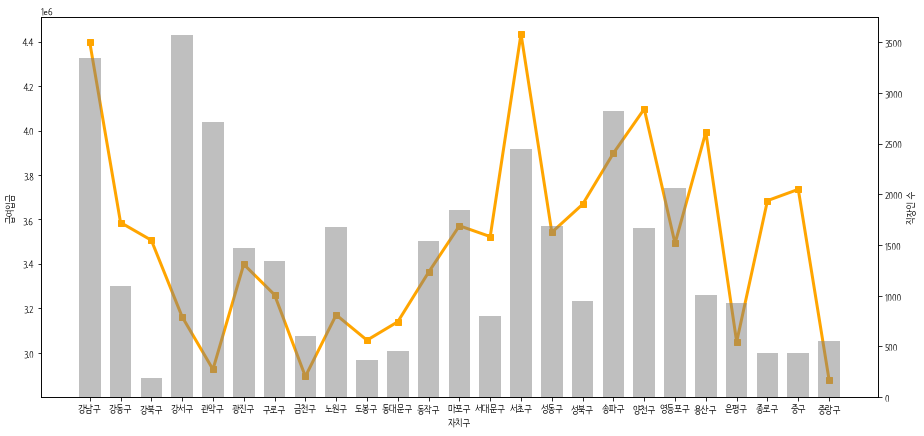

In [18]:
## 직장인 수와 급여입금 관계 파악

# x축 : 자치구 = county
# y축 선: 직장인 수 = worker
# y축 막대 : 급여입금 (= pay)
fig, ax1 = plt.subplots(figsize=(15,7))

ax1.plot(county, pay,'-s', color='orange', label='급여입금', markersize=6, linewidth=3)
ax1.set_xlabel('자치구')
ax1.set_ylabel('급여입금')

ax2 = ax1.twinx()
ax2.bar(county, worker, color='gray', label='직장인 수', alpha=0.5, width=0.7)
ax2.set_ylabel('직장인 수')

plt.show()

## 📌 직장인 수 와 다른 피처들과의 관계 (총소비금액/총수신금액)

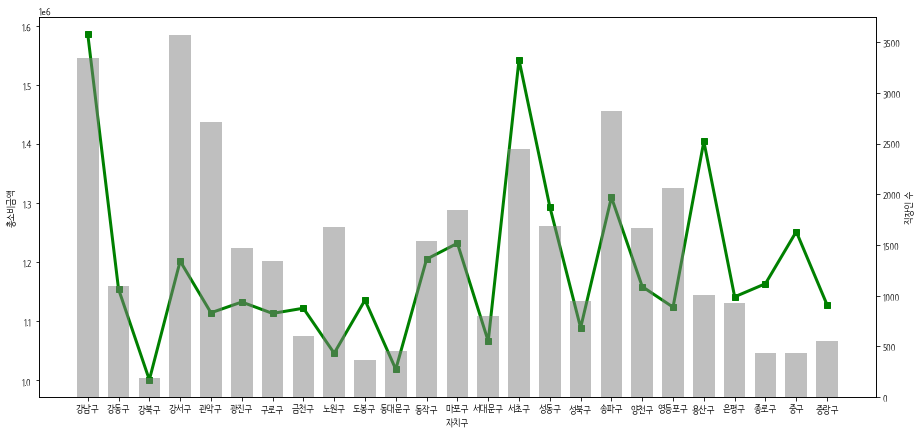

In [19]:
## 직장인 수와 총소비금액 사이 관계 파악

# x축 : 자치구 = county
# y축 선 : 직장인 수 = worker
# y축 막대 : 총소비금액 (= consumption) 
fig, ax1 = plt.subplots(figsize=(15,7))

ax1.plot(county, consumption,'-s', color='green', label='총소비금액', markersize=6, linewidth=3)
ax1.set_xlabel('자치구')
ax1.set_ylabel('총소비금액')

ax2 = ax1.twinx()
ax2.bar(county, worker, color='gray', label='직장인 수', alpha=0.5, width=0.7)
ax2.set_ylabel('직장인 수')

plt.show()

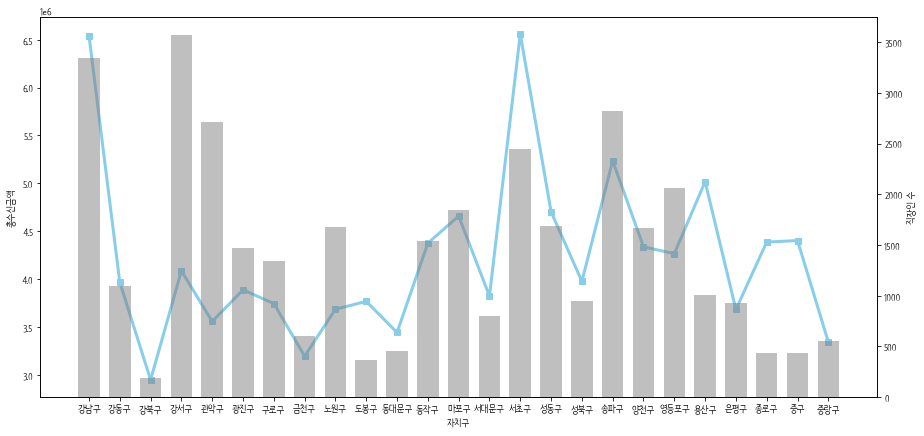

In [20]:
## 직장인 수와 총수신금액 사이 관계 파악

# x축 : 자치구 = county
# y축 선 : 직장인 수 = worker
# y축 막대 : 총수신금액 = credit
fig, ax1 = plt.subplots(figsize=(15,7))

ax1.plot(county, credit,'-s', color='skyblue', label='총수신금액', markersize=6, linewidth=3)
ax1.set_xlabel('자치구')
ax1.set_ylabel('총수신금액')

ax2 = ax1.twinx()
ax2.bar(county, worker, color='gray', label='직장인 수', alpha=0.5, width=0.7)
ax2.set_ylabel('직장인 수')

plt.show()

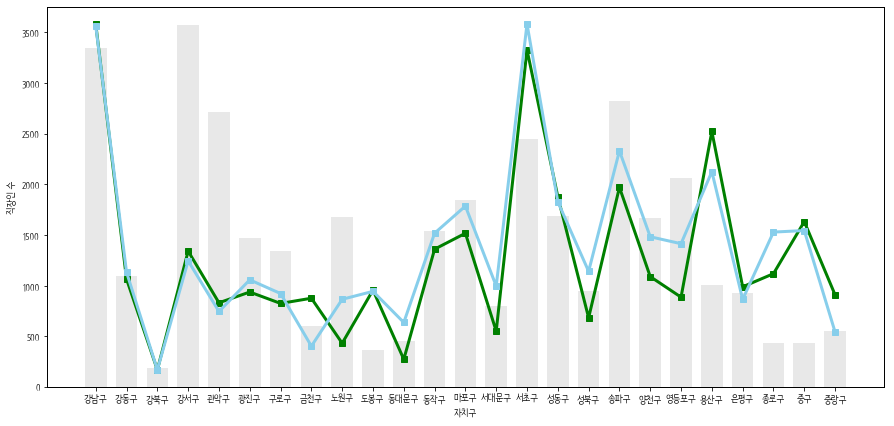

In [21]:
## 직장인 수와 총소비금액 & 총수신금액 경향성 파악하기

# x축 : 자치구 = county
# y축 막대 : 직장인 수 = worker
# y축 선 green : 총소비금액
# y축 선 skyblue : 총수신금액

fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(county, worker, color='lightgray', label='직장인 수', alpha=0.5, width=0.7)
ax1.set_xlabel('자치구')
ax1.set_ylabel('직장인 수')

ax2 = ax1.twinx()
ax2.plot(county, consumption,'-s', color='green', label='총소비금액', markersize=6, linewidth=3)
ax2.set_xlabel('자치구')
ax2.set_yticks([])

ax3 = ax1.twinx()
ax3.plot(county, credit,'-s', color='skyblue', label='총수신금액', markersize=6, linewidth=3)
ax3.set_xlabel('자치구')
ax3.set_yticks([])

plt.show()

## 📌 급여입금 과 다른 피처들과의 관계(총소비금액/총수신금액)

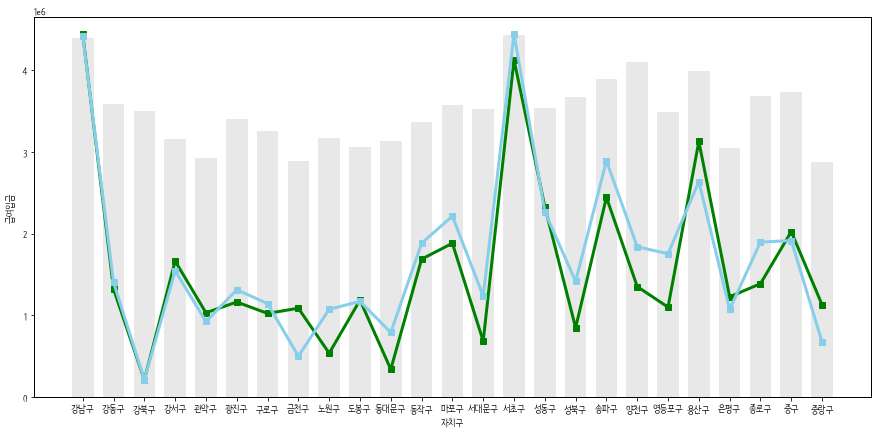

In [22]:
## 급여입금과 총소비금액 & 총수신금액 경향성 파악하기

# x축 : 자치구 = county
# y축 막대 : 급여입금 = pay
# y축 선 green : 총소비금액
# y축 선 skyblue : 총수신금액

fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(county, pay, color='lightgray', label='급여입금', alpha=0.5, width=0.7)
ax1.set_xlabel('자치구')
ax1.set_ylabel('급여입금')

ax2 = ax1.twinx()
ax2.plot(county, consumption,'-s', color='green', label='총소비금액', markersize=6, linewidth=3)
ax2.set_xlabel('자치구')
ax2.set_yticks([])

ax3 = ax1.twinx()
ax3.plot(county, credit,'-s', color='skyblue', label='총수신금액', markersize=6, linewidth=3)
ax3.set_xlabel('자치구')
ax3.set_yticks([])

plt.show()

C:\Users\serak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\serak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


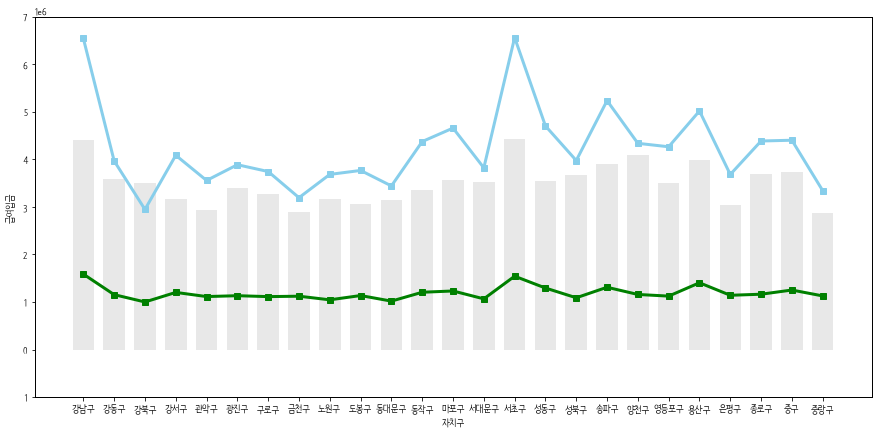

In [23]:
## 급여입금과 총소비금액 & 총수신금액 경향성 파악하기 (1e6, 백만으로 단위 맞춘 경우)

# x축 : 자치구 = county
# y축 막대 : 급여입금 = pay
# y축 선 green : 총소비금액
# y축 선 skyblue : 총수신금액

fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(county, pay, color='lightgray', label='급여입금', alpha=0.5, width=0.7)
ax1.set_xlabel('자치구')
ax1.set_ylabel('급여입금')
ax1.set_ylim(-1*1e6, 7*1e6)

ax2 = ax1.twinx()
ax2.plot(county, consumption,'-s', color='green', label='총소비금액', markersize=6, linewidth=3)
ax2.set_xlabel('자치구')
ax2.set_yticks([])
ax2.set_ylim(-1*1e6, 7*1e6)


ax3 = ax1.twinx()
ax3.plot(county, credit,'-s', color='skyblue', label='총수신금액', markersize=6, linewidth=3)
ax3.set_xlabel('자치구')
ax3.set_yticks([])
ax3.set_ylim(-1*1e6, 7*1e6)

plt.show()